In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('fma_tracks.csv', low_memory=False)
df

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
full_data = pd.read_csv('fma_tracks.csv', low_memory=False)
# Scale all numeric columns into [0,1] except for "track_id"
numeric_data = full_data.select_dtypes(include='number').drop(columns='track_id')

In [3]:
ratings = pd.read_csv('likes.csv', low_memory=False)
# Remove some uninteresting features
input_features = set(numeric_data.columns) - {'artist_latitude', 'artist_longitude', 'latitude', 'longitude',
                                             'comments', 'comments.1', 'comments.2', 'duration', 'favorites',
                                             'favorites.1', 'favorites.2', 'id', 'id.1', 'interest', 'listens',
                                             'number', 'tracks', 'Unnamed: 53'}
# Remove the often-empty rankings
input_features = [feature for feature in input_features if 'rank' not in feature]
output_features = ['like']
# Merge like column into track info
full_ratings = pd.merge(full_data, ratings[['track_id']+output_features], on='track_id', how='inner')
# Use only the chosen features, and drop any rows with *any* empty values for those features
train = full_ratings[input_features+output_features].dropna()
print(f'Liked {len(train[train["like"] == 1])}/{len(train)} tracks')

Liked 44/110 tracks


In [4]:
# provided settings
max_iter = 1000
settings = [{'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (1000,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
           ]

<h3>Section 1: Just Some Experiment</h3>

In [5]:
# trial 1: keep max_iter to be 1000 and give more sets of parameters
max_iter = 1000
settings = [{'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (200,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (300,), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (400,), 'activation': 'tanh', 'solver': 'adam', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (500,), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
           ]

In [8]:
# trial 2: let max_iter be 200 and also try different sets of parameters
max_iter = 200
settings = [{'hidden_layer_sizes': (600,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (700,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (800,), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (900,), 'activation': 'tanh', 'solver': 'adam', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (1000,), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
           ]

In [11]:
# trial 3: let max_iter be 200 and change adam solvers to lbfgs because adam works well on larger datasets according to document
max_iter = 200
settings = [{'hidden_layer_sizes': (600,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (700,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (800,), 'activation': 'relu', 'solver': 'lbfgs', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (900,), 'activation': 'tanh', 'solver': 'lbfgs', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (1000,), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
           ]

In [14]:
# trial 4: let max_iter be 200 and keep solver to be sgd because adam and lbfgs does seem to work well here
max_iter = 200
settings = [{'hidden_layer_sizes': (600,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (700,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (800,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (900,), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (1000,), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
           ]

<h3>Section 2: Experimenting with Logistic Activation</h3>
<h5>After experimenting with different parameter combinations, I found that logistic activation is more stable than other activation functions, and I believe it's because we have binary output space</h5>

In [17]:
# trial 1: keep max_iter to be 200 and trial on solver
max_iter = 200
settings = [{'hidden_layer_sizes': (200,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (400,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (600,), 'activation': 'logistic', 'solver': 'adam', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (800,), 'activation': 'logistic', 'solver': 'lbfgs', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (1000,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
           ]

In [20]:
# trial 2: keep max_iter to be 500 and solver to be sgd, try different learning rates and momentums
max_iter = 500
settings = [{'hidden_layer_sizes': (200,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (400,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.8, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (600,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.7, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (800,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-4, 'early_stopping': False},
            {'hidden_layer_sizes': (1000,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'adaptive',
             'learning_rate_init': 0.001, 'momentum': 0.8, 'tol': 1e-4, 'early_stopping': False},
           ]

In [23]:
# trial 3: keep max_iter to be 1000, sgd solver, and constant learning rate but with smaller tolerance
max_iter = 1000
settings = [{'hidden_layer_sizes': (200,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-6, 'early_stopping': False},
            {'hidden_layer_sizes': (400,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-7, 'early_stopping': False},
            {'hidden_layer_sizes': (600,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (800,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-9, 'early_stopping': False},
            {'hidden_layer_sizes': (1000,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.9, 'tol': 1e-9, 'early_stopping': False},
           ]

<h3>Section 3: Trying the find a set of parameters with loss as small as possible</h3>
<h5>After previous experimentations, I found that MLPs with more hidden layers, logistic activation, sgd solver, constant learning rate, and small tolerance seem to perform better. Here I will do a final set of experimentations to see if I can find a minimum loss</h5>

In [26]:
# trial 1: keep max_iter to be 1000, sgd solver, and constant learning rate, smaller tolerance, and make learning step smaller
max_iter = 1000
settings = [{'hidden_layer_sizes': (200,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.0005, 'momentum': 0.9, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (400,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.0005, 'momentum': 0.9, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (600,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.0005, 'momentum': 0.9, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (800,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.0005, 'momentum': 0.9, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (1000,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.0005, 'momentum': 0.9, 'tol': 1e-8, 'early_stopping': False},
           ]

In [29]:
# trial 2: keep max_iter to be 1000, sgd solver, and constant learning rate, smaller tolerance, change momentum
max_iter = 1000
settings = [{'hidden_layer_sizes': (200,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.8, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (400,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.85, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (600,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.85, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (800,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.95, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (1000,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.95, 'tol': 1e-8, 'early_stopping': False},
           ]

<h3>Conclusion:</h3><h5>With more hidden layers, logistic activation, sgd solver, constant learning rate, and small tolerance, MLP performs better. Smaller step of learning rate does not improve the performance. Higher momentum for sgd result in a smaller loss. Therefore, I conclude my experimentations that with 1000 hideen layers, ogistic activation, sgd solver, constant learning rate, 0.95 momentum, and 1e-8 tolerance has one of the best performances with loss of 0.016</h5>

In [32]:
max_iter = 1000
settings = [{'hidden_layer_sizes': (200,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.95, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (400,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.95, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (600,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.95, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (800,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.95, 'tol': 1e-8, 'early_stopping': False},
            {'hidden_layer_sizes': (1000,), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant',
             'learning_rate_init': 0.001, 'momentum': 0.95, 'tol': 1e-8, 'early_stopping': False},
           ]

<h3> Analysis on warning:</h3><h4>The optimization is not converged when maximum iterations of 1000 is reached. I have tried to increase the number of iterations and the SGD still does not converge. According to the plot, the decrease of loss is insignificant at 1000th iteraion. Therefore, I have kept the max_iter to be 1000 for efficiency.</h4>

/Users/peterxu/Documents/USC/学习/Senior_Spring/DSCI352/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/peterxu/Documents/USC/学习/Senior_Spring/DSCI352/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


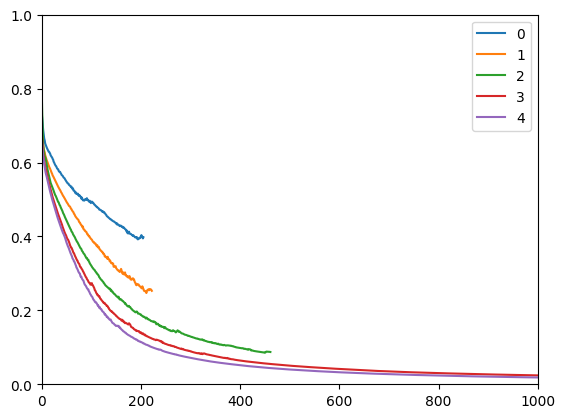

In [33]:
# Create an MLP for each of our different settings
clfs = [MLPClassifier(max_iter=max_iter, **args) for args in settings]
# Train each MLP
for index, clf in enumerate(clfs):
    clf.fit(train[input_features], train[output_features].values.ravel())
    plt.plot(clf.loss_curve_, label=str(index))
# Customize our plot and display
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, max_iter)
plt.show()

In [34]:
# Choose network with minimimal loss
index, best_clf = min([(clf_i[1].loss_, clf_i) for clf_i in enumerate(clfs)])[1]
print(f'Minimal loss of {best_clf.loss_} achieved with: {sorted(settings[index].items())}')

Minimal loss of 0.018440908168421623 achieved with: [('activation', 'logistic'), ('early_stopping', False), ('hidden_layer_sizes', (1000,)), ('learning_rate', 'constant'), ('learning_rate_init', 0.001), ('momentum', 0.95), ('solver', 'sgd'), ('tol', 1e-08)]


<h4>Below block tries to run a GridSearch Cross Validation to find the best set of parameters for the MLP. However, the task is too large and the runtime is excessive. Thus, this is just an attempt that is not taken into actual application.</h4>

In [ ]:
### RUNTIME IS EXCESSIVE
# try a cross validation
from sklearn.model_selection import GridSearchCV
X = train.drop(columns='like')
y = train['like']
X_train, X_test, y_train, y_test = train_test_split(X, y)
params_grid = {
    'hidden_layer_sizes': [(200,), (400,), (600,), (800,), (1000,)],
    'activation': ['logistic', 'relu', 'tanh'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.0005, 0.001, 0.005],
    'momentum': [0.85, 0.9, 0.95],
    'tol': [1e-5, 1e-6, 1e-7, 1e-8],
}
mlp = MLPClassifier(max_iter=1000, early_stopping=False)
grid_search = GridSearchCV(mlp, params_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)

In [35]:
# Examine the links of the chosen MLP (original code assumes only one hidden layer)
hidden_coefs, output_coefs = best_clf.coefs_
# Each set of coefficients is a matrix over i,j, where i indexes into the input and j the output, for that layer
influence = [(sum([abs(hidden_coefs[i][j]*output_coefs[j][0]) for j in range(len(output_coefs))]),
              best_clf.feature_names_in_[i]) for i in range(len(hidden_coefs))]
top_features = [entry[1] for entry in sorted(influence, reverse=True)[:10]]
print('\n'.join(top_features))

temporal_feature_223
temporal_feature_131
temporal_feature_127
temporal_feature_33
temporal_feature_53
temporal_feature_10
temporal_feature_98
temporal_feature_66
temporal_feature_11
temporal_feature_95


In [36]:
# Prediction represents values over both 0 and 1, so let's find out where 1 is
true_index = list(best_clf.classes_).index(1)
# If we want only those tracks in fma_small
small_data = full_data[full_data['subset'] == 'small']
# Remove tracks already rated
rated_tracks = set(full_ratings['track_id'])
small_data = small_data[small_data.track_id.isin(rated_tracks) == False]
# Generated predictions over unrated tracks
predictions = [prob[true_index] for prob in best_clf.predict_proba(small_data[input_features])]
small_data = small_data.assign(prediction=predictions)
# Find top N recommendations
top_limit = 10
top_tracks = small_data.nlargest(top_limit, 'prediction')
print(top_tracks.to_string(columns=['track_id', 'artist_name', 'title.1'], index=False, max_colwidth=40))

 track_id            artist_name                    title.1
    11922              WatFatMan galerie de portraits remix
    29480    Falcao and Monashee         Fighting Challenge
    11920              WatFatMan                      Ofura
    19074                Bell X1         The Great Defector
    75389           Kellee Maize          City of Champions
    18159 The Friendly Dimension             Just Your Game
    35296                  Dntel        Super Antihistamine
      200               Ed Askew             Baby Come Home
     3910        Michael Chapman               Kodak Ghosts
    14653             Brad Sucks                   Bad Sign


In [37]:
top_artists = small_data.groupby('artist_name')['prediction'].mean().nlargest(top_limit)
# Print the available tracks for the top N artists
for rank, name in enumerate(top_artists.index):
    print(f'{rank+1:02d}. {name}')
    print('\t', small_data[small_data['artist_name'] == name][['track_id', 'title.1']].to_string(index=False, header=False).replace('\n', '\n\t '))

01. Falcao and Monashee
	 29480 Fighting Challenge
02. The Friendly Dimension
	 18159 Just Your Game
03. Dntel
	 35296 Super Antihistamine
04. Soul Celtics
	 17462 Baby With A Bamboo Heart
05. Art Boys Collection
	 42475 A 1 Freedom voice of my soul
06. The Dead Poets
	 42046 Bottles of Reason
07. Seven
	 15210 Go Away
08. Empathik
	 12531 Que Le Hip-Hop Renaisse
09. DavidBowman
	 11937 Wir können auch anders
10. The Lights Galaxia
	 23016 While She Sleeps (Morning Edit)
